In [ ]:
!pip install jdatetime
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import jdatetime as jdt
import re
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Add Data Set

In [ ]:
#Kaggle API Data Set 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download arianghasemi/divar-cars

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#unzip dataset
! mkdir Iran_cars_price_prediction
!unzip divar-cars.zip -d Iran_cars_price_prediction

unzip:  cannot find or open divar-cars.zip, divar-cars.zip.zip or divar-cars.zip.ZIP.


In [ ]:
#df = pd.read_csv('/content/Iran_cars_price_prediction/Cars_dataset.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/result2.csv')

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   56402 non-null  object 
 1   Model_Year             56402 non-null  object 
 2   Color                  56399 non-null  object 
 3   Mileage                56402 non-null  object 
 4   Brand                  56402 non-null  object 
 5   Body_Condition         54955 non-null  object 
 6   Price                  43306 non-null  float64
 7   Engine_Condition       53853 non-null  object 
 8   Chassis_Condition      46407 non-null  object 
 9   Third_party_insurance  52407 non-null  object 
 10  Gearbox                52954 non-null  object 
 11  Selling_Method         52637 non-null  object 
 12  Time                   56402 non-null  object 
 13  Location               56402 non-null  object 
dtypes: float64(1), object(13)
memory usage: 6.0+ MB


 1- Model Management

In [ ]:

df['Model_Year'].value_counts()

۱۴۰۰    6978
۱۳۹۷    4483
۱۳۹۶    4263
۱۳۹۸    3990
۱۳۹۹    3513
        ... 
۲۰۰۱      15
۱۳۶۸      13
۱۳۶۶      12
۲۰۲۱       5
۲۰۲۰       3
Name: Model_Year, Length: 71, dtype: int64

In [ ]:
%%time 
df['Model_Year'] = df['Model_Year']. apply(lambda x: int(x) if x.isdigit() else x )

CPU times: user 31.1 ms, sys: 1.7 ms, total: 32.8 ms
Wall time: 35.5 ms


In [ ]:
df.loc[df['Model_Year'].str.contains('قبل')==True , 'Model_Year'] = 1365

2- Model Year Management 

In [ ]:
#Handeling miladi years in model_year
df[df['Model_Year']>1500].shape[0]

4964

In [ ]:
#Handeling miladi years in model_year
df['Model_Year']= df['Model_Year'].apply(lambda x: x if x< 1500 else jdt.date.fromgregorian(day = 1 , month = 1 , year=x).year )


3- Color Management

In [ ]:
df['Color'].value_counts(normalize=True)

سفید          0.534779
مشکی          0.093016
نقره ای       0.086331
خاکستری       0.050675
سفید صدفی     0.042359
نوک مدادی     0.041313
آبی           0.033423
یشمی          0.016011
بژ            0.014947
زرد           0.011206
دلفینی        0.010514
سرمه ای       0.008192
سبز           0.007571
نقرآبی        0.006454
قرمز          0.006011
قهوه ای       0.005071
آلبالویی      0.004805
زیتونی        0.002979
طوسی          0.002943
ذغالی         0.002642
اطلسی         0.002252
بادمجانی      0.002039
عنابی         0.001968
مسی           0.001933
سربی          0.001667
کرم           0.001259
زرشکی         0.001241
عدسی          0.001170
بنفش          0.000904
گیلاسی        0.000833
نارنجی        0.000745
تیتانیوم      0.000745
طلایی         0.000638
کربن بلک      0.000337
خاکی          0.000337
موکا          0.000266
برنز          0.000213
پوست پیازی    0.000213
Name: Color, dtype: float64

In [ ]:
np.where(df['Color'].value_counts(normalize=True) > 0.02)[0]

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
intermediate = [df['Color'].value_counts(normalize=True).index[i] for i in range(1,7)]

In [ ]:

# handeling colors:
def color_handler(x):
  if x == 'سفید':
    return 'popular'
  elif x in intermediate :
    return 'intermediate'
  else:
    return 'rare'


In [ ]:
df['Color'] = df['Color'] . apply(color_handler)

4- Mileage Management

In [ ]:
#df['Mileage'].astype('int')

In [ ]:
df['Mileage'] = df['Mileage'].apply(lambda x: re.sub('٬' , '' , x)) 

In [ ]:
df['Mileage']= df['Mileage'].astype(int , errors='raise')

In [ ]:
# some of mileage maybe wrong as 532 maybe means 532000
df[df['Mileage'] < 1000]

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location
0,Tehran,1376,intermediate,532,نیسان، پاترول 4 در، 6 سیلندر,تمام رنگ,235000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,آجودانیه
2,Tehran,1399,popular,0,SE ،131 ،پراید,سالم و بی خط و خش,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد
8,Tehran,1390,popular,300,پژو، 206، تیپ ۲,دوررنگ,NaN,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار
19,Tehran,1400,popular,8,تیبا، هاچبک، پلاس,سالم و بی خط و خش,186000000.0,NaN,سالم و پلمپ,NaN,NaN,NaN,2022-03-19,قرچک
20,Tehran,1393,popular,195,پیکان، وانت، بنزینی,خط و خش جزیی,123000000.0,سالم,سالم و پلمپ,۱۱ ماه,دنده ای,نقدی,2022-03-12,بومهن
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56390,Shiraz,1400,popular,0,پژو، 207i، پانوراما دنده ای,سالم و بی خط و خش,367000000.0,سالم,سالم و پلمپ,۱۱ ماه,دنده ای,نقدی,2022-03-19,وحدت (بلوار مدرس)
56392,Shiraz,1400,intermediate,0,هایما، S5، اتوماتیک ۶ سرعته,سالم و بی خط و خش,705000000.0,سالم,سالم و پلمپ,۱۲ ماه,اتوماتیک,نقدی,2022-03-12,مرودشت
56394,Shiraz,1393,intermediate,70,پیکان، وانت، بنزینی,سالم و بی خط و خش,140000000.0,سالم,سالم و پلمپ,۱ ماه,دنده ای,نقدی,2022-03-12,شهرک امیر کبیر
56395,Shiraz,1400,popular,0,کوییک، دنده ای، ساده,سالم و بی خط و خش,195000000.0,سالم,سالم و پلمپ,۱۲ ماه,دنده ای,نقدی,2022-03-05,فرهنگ شهر


In [ ]:
df['inser_date'] = df['Time'].apply(lambda x: jdt.date.fromgregorian(day = int(x.split('-')[2]) , month = int(x.split('-')[1]) , year=int(x.split('-')[0])))

In [ ]:
# if mileage is under 1000 and at least two years have passed since the life of the car it's probably should multiple by 1000

for i in df[df['Mileage'] < 1000].index:
  if df.loc[i , 'inser_date'].year - df.loc[i ,'Model_Year']> 1 and df.loc[i , 'Mileage']!=0 : 
    df.loc[i ,'Mileage'] = df.loc[i ,'Mileage'] *1000

5- Body Condication

In [ ]:
df['Body_Condition'].value_counts()


سالم و بی خط و خش              27784
خط و خش جزیی                   11212
دوررنگ                          4564
رنگ شدگی در ۱ ناحیه             2778
رنگ شدگی در ۲ ناحیه             2068
تمام رنگ                        1317
رنگ شدگی در ۳ ناحیه              859
رنگ شدگی، در ۲ ناحیه             697
رنگ شدگی، در ۱ ناحیه             686
رنگ شدگی، در چند ناحیه           677
صافکاری بی رنگ، در ۱ ناحیه       541
تصادفی                           379
رنگ شدگی در ۴ ناحیه              327
۱۲ ماه                           217
صافکاری بی رنگ، در ۲ ناحیه       205
صافکاری بی رنگ                   118
رنگ شدگی در ۵ ناحیه              100
۶ ماه                             62
صافکاری بی رنگ، در ۳ ناحیه        56
رنگ شدگی در ۶ ناحیه               48
اوراقی                            34
اتوماتیک                          27
رنگ شدگی در ۷ ناحیه               19
رنگ شدگی در ۱۰ ناحیه              18
صافکاری بی رنگ، در ۴ ناحیه        17
رنگ شدگی در ۹ ناحیه               16
۸ ماه                             14
۷

In [ ]:
df[df['Body_Condition'].str.contains('رنگ شدگی') == True]['Body_Condition'].value_counts()

رنگ شدگی در ۱ ناحیه       2778
رنگ شدگی در ۲ ناحیه       2068
رنگ شدگی در ۳ ناحیه        859
رنگ شدگی، در ۲ ناحیه       697
رنگ شدگی، در ۱ ناحیه       686
رنگ شدگی، در چند ناحیه     677
رنگ شدگی در ۴ ناحیه        327
رنگ شدگی در ۵ ناحیه        100
رنگ شدگی در ۶ ناحیه         48
رنگ شدگی در ۷ ناحیه         19
رنگ شدگی در ۱۰ ناحیه        18
رنگ شدگی در ۹ ناحیه         16
رنگ شدگی در ۸ ناحیه          9
Name: Body_Condition, dtype: int64

In [ ]:
for i in df[df['Body_Condition'].str.contains('،') == True].index:
  df.loc[i , 'Body_Condition'] = re.sub('،' , '' , df.loc[i , 'Body_Condition']) 


In [ ]:

valid_conditions = ['سالم' , 'خط و خش جزیی' , 'دوررنگ' , 'رنگ شدگی' , 'صافکاری' , 'تمام رنگ' , 'تصادفی' , 'اوراقی']
df[df['Body_Condition'].str.contains('|'.join(valid_conditions)) == True ]['Body_Condition'].value_counts()
#df.loc[23 ,'Body_Condition'].split(' ')[3]

سالم و بی خط و خش             27784
خط و خش جزیی                  11212
دوررنگ                         4564
رنگ شدگی در ۱ ناحیه            3464
رنگ شدگی در ۲ ناحیه            2765
تمام رنگ                       1317
رنگ شدگی در ۳ ناحیه             859
رنگ شدگی در چند ناحیه           677
صافکاری بی رنگ در ۱ ناحیه       541
تصادفی                          379
رنگ شدگی در ۴ ناحیه             327
صافکاری بی رنگ در ۲ ناحیه       205
صافکاری بی رنگ                  118
رنگ شدگی در ۵ ناحیه             100
صافکاری بی رنگ در ۳ ناحیه        56
رنگ شدگی در ۶ ناحیه              48
اوراقی                           34
رنگ شدگی در ۷ ناحیه              19
رنگ شدگی در ۱۰ ناحیه             18
صافکاری بی رنگ در ۴ ناحیه        17
رنگ شدگی در ۹ ناحیه              16
رنگ شدگی در ۸ ناحیه               9
صافکاری بی رنگ در ۵ ناحیه         8
صافکاری بی رنگ در ۱۰ ناحیه        6
صافکاری بی رنگ در ۶ ناحیه         5
صافکاری بی رنگ در ۹ ناحیه         2
Name: Body_Condition, dtype: int64

In [ ]:
df[df['Body_Condition'].str.contains('|'.join(valid_conditions)) == True ].shape[0]

54550

In [ ]:


# Brand is unclear so droping them is a good choose ! 
df[df['Body_Condition'].str.contains('|'.join(valid_conditions)) == False ]


,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date
129,Tehran,1400,popular,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,دنده ای,نقدی و قسطی,غیرقابل نمایش,2022-02-19,نصرت,1400-11-30
147,Tehran,1400,rare,0,سالم,۱۲ ماه,NaN,سالم و بی خط و خش,NaN,اتوماتیک,قسطی,۱۸۱٬۰۰۰٬۰۰۰ تومان,2022-03-28,گیشا (کوی نصر),1401-01-08
204,Tehran,1400,popular,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,اتوماتیک,نقدی و قسطی,۲۰۴٬۰۰۰٬۰۰۰ تومان,2022-03-26,سعادت آباد,1401-01-06
208,Tehran,1400,intermediate,0,سالم,۱۲ ماه,NaN,سالم و بی خط و خش,NaN,دنده ای,قسطی,۱۳۸٬۰۰۰٬۰۰۰ تومان,2022-03-26,گیشا (کوی نصر),1401-01-06
341,Tehran,1400,popular,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,دنده ای,نقدی و قسطی,توافقی,2022-03-05,امانیه,1400-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55183,Shiraz,1400,popular,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,اتوماتیک,نقدی و قسطی,۲۸۵٬۰۰۰٬۰۰۰ تومان,2022-03-12,محمدیه,1400-12-21
55791,Shiraz,1400,popular,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,اتوماتیک,نقدی و قسطی,غیرقابل نمایش,2022-04-02,وحدت (بلوار مدرس),1401-01-13
55947,Shiraz,1400,intermediate,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,اتوماتیک,نقدی و قسطی,۹۰۹٬۴۰۰٬۰۰۰ تومان,2022-03-26,وحدت (بلوار مدرس),1401-01-06
56331,Shiraz,1400,intermediate,0,سالم,۱۲ ماه,NaN,سالم و پلمپ,سالم و بی خط و خش,دنده ای,نقدی,توافقی,2022-03-05,وحدت (بلوار مدرس),1400-12-14


In [ ]:
a_df = df.copy()

In [ ]:
dp_ind = a_df[a_df['Body_Condition'].str.contains('|'.join(valid_conditions)) == False ].index.to_list()

In [ ]:
a_df.drop(dp_ind , axis=0 , inplace=True)

In [ ]:
a_df.reset_index(drop=True , inplace=True)

In [ ]:


a_df['Body_Condition'].value_counts()

سالم و بی خط و خش             27784
خط و خش جزیی                  11212
دوررنگ                         4564
رنگ شدگی در ۱ ناحیه            3464
رنگ شدگی در ۲ ناحیه            2765
تمام رنگ                       1317
رنگ شدگی در ۳ ناحیه             859
رنگ شدگی در چند ناحیه           677
صافکاری بی رنگ در ۱ ناحیه       541
تصادفی                          379
رنگ شدگی در ۴ ناحیه             327
صافکاری بی رنگ در ۲ ناحیه       205
صافکاری بی رنگ                  118
رنگ شدگی در ۵ ناحیه             100
صافکاری بی رنگ در ۳ ناحیه        56
رنگ شدگی در ۶ ناحیه              48
اوراقی                           34
رنگ شدگی در ۷ ناحیه              19
رنگ شدگی در ۱۰ ناحیه             18
صافکاری بی رنگ در ۴ ناحیه        17
رنگ شدگی در ۹ ناحیه              16
رنگ شدگی در ۸ ناحیه               9
صافکاری بی رنگ در ۵ ناحیه         8
صافکاری بی رنگ در ۱۰ ناحیه        6
صافکاری بی رنگ در ۶ ناحیه         5
صافکاری بی رنگ در ۹ ناحیه         2
Name: Body_Condition, dtype: int64

In [ ]:
a_df['Body_Condition'].fillna('Nan' , inplace=True)

In [ ]:
def body_condition(x):

  if x == 'سالم و بی خط و خش':
    return 'intact'
  elif x=='خط و خش جزیی':
    return 'scratches'
  elif 'رنگ شدگی' in x and x.split(' ')[3] != 'چند' and int(x.split(' ')[3])>4 :
    return 'round color'
  elif 'رنگ شدگی' in x and  x.split(' ')[3] == 'چند':
    return 'multi spot color '
  elif 'رنگ شدگی' in x:
    return f'{int(x.split(" ")[3])} spot color'
  elif x =='تصادفی' : 
    return 'crashed'
  elif x == 'اوراقی':
    return 'scrap' 
  elif 'صافکاری' in x and 'ناحیه' not in x :
    return 'multi spot repare'
  elif 'صافکاری' in x and int(x.split(' ')[4])>2:
    return 'multi spot repare'
  elif 'صافکاری' in x and int(x.split(' ')[4])<=2:
    return 'under 2 spot repare'
  elif x =='تمام رنگ':
    return 'full color'
  elif x == 'دوررنگ':
    return 'round color'
  else:
    return x
    

In [ ]:
a_df['Body_Condition']=a_df['Body_Condition'].apply(body_condition)

In [ ]:
a_df['Body_Condition'].value_counts()

intact                 27784
scratches              11212
round color             4774
1 spot color            3464
2 spot color            2765
Nan                     1447
full color              1317
3 spot color             859
under 2 spot repare      746
multi spot color         677
crashed                  379
4 spot color             327
multi spot repare        212
scrap                     34
Name: Body_Condition, dtype: int64

6- Brand Management

In [ ]:
b_df = a_df.copy()

b_df['Brand'] = b_df['Brand'].apply(lambda x: re.sub('،' , '' , x))

In [ ]:
b_df['Brand'].value_counts()

SE 131 پراید                2692
پژو 206 تیپ ۲               2115
پژو GLX 405 بنزینی          1864
پراید صندوق دار بنزینی      1561
SE 111 پراید                1436
                            ... 
پژو پارس                       1
335i بی ام و سری 3 کوپه        1
CLK200 کوپه CLK بنز کلاس       1
S مازراتی گرن توریسمو          1
فولکس بیتل                     1
Name: Brand, Length: 925, dtype: int64

In [ ]:
b_df[b_df['Brand'].str.contains('206')==True]['Brand'].value_counts()

پژو 206 تیپ ۲     2115
پژو 206 تیپ ۵     1233
SD V8 206 پژو      922
پژو 206 تیپ ۳      121
SD V20 206 پژو      79
پژو 206 تیپ ۶       75
SD V9 206 پژو       48
SD V1 206 پژو       48
پژو 206 تیپ ۱       27
SD V2 206 پژو       18
SD V6 206 پژو       12
پژو 206 تیپ ۴        6
SD V10 206 پژو       5
SD V19 206 پژو       2
پژو 206              1
Name: Brand, dtype: int64

In [ ]:
b_df.loc[8 , 'Brand'].split()[-1]

'۲'

In [ ]:
def brand_management1(df):

  for i in df['Brand'].index: 

    if 'پراید' in df.loc[i,'Brand']:
      if 'دوگانه سوز' in df.loc[i,'Brand']:
        df.loc[i, 'Type'] = 'hybrid'
      elif '111' in df.loc[i,'Brand']:
        df.loc[i, 'Type'] = '111'
      else: 
        df.loc[i, 'Type'] = 'pride'


      df.loc[i,'Brand'] = 'pride'


    elif '206' in df.loc[i,'Brand']:
      if 'SD' in df.loc[i,'Brand']:
        df.loc[i,'Type'] = 'SD'
      elif 'تیپ' in df.loc[i,'Brand']:
        df.loc[i,'Type'] = int(df.loc[i,'Brand'].split()[-1])
      else:
        df.loc[i,'Type'] ='206'

      df.loc[i,'Brand'] = '206'


In [ ]:
def brand_management(df):

  for i in df['Brand'].index:
    if 'پراید' in df.loc[i,'Brand']:
      df.loc[i,'Brand'] = 'pride' 
      try:
        df.loc[i, 'Type'] = [int(a) for a in df.loc[i , 'Brand'].split() if a.isdigit()][0]
      except:
         df.loc[i, 'Type'] = 'pride'
    elif 'پژو' in df.loc[i,'Brand']:

      if '206' in df.loc[i,'Brand']:
        df.loc[i,'Brand'] = '206'

        if 'SD' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'SD'
        elif 'تیپ' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = df.loc[i,'Brand'].split()[-1]
        else:
          df.loc[i,'Type'] =0 

        
        
        #try:
        #  df.loc[i, 'Type'] = int(df.loc[i,'Brand'].split()[3]) if df.loc[i,'Brand'].split()[3].isdigit() else df.loc[i,'Brand'].split()[3]
        #except:
        #  pass

      elif 'GLX' in df.loc[i,'Brand'] or 'glx' in df.loc[i,'Brand']:
        df.loc[i,'Brand'] = 'GLX'
        if 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'
        else:
          df.loc[i,'Type'] = 'GLX'

      elif 'پارس' in df.loc[i,'Brand']:
        df.loc[i,'Brand'] = 'pars'
        if 'ELX' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'ELX'
        elif 'TU5' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'TU5'
        elif 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'

      elif 'تندر' in df.loc[i,'Brand']:

        df.loc[i,'Brand'] = 'l90'

        if 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'

        elif 'E' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = df.loc[i,'Brand'].split(2)
        
        elif 'وانت' in df.loc[i,'Brand']:

          df.loc[i,'Type'] = 'van'

        else:
           df.loc[i,'Type'] = 'l90'


      elif 'تیبا' in df.loc[i,'Brand']: 
        df.loc[i,'Brand'] = 'tiba'

        if 'هاچبک' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'tiba 2'

        elif 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'

        else: 
           df.loc[i,'Type'] = 'tiba'

      elif 'ساینا' in df.loc[i,'Brand']:

        df.loc[i,'Brand'] = 'sayna'

        if 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'
        else:
          df.loc[i,'Type'] = 'sayna'

      elif 'سمند' in df.loc[i,'Brand']: 
        df.loc[i,'Brand'] = 'samand'

        if 'دوگانه سوز' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'hybrid'

        elif 'EF7' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'EF7'

        elif 'X7' in df.loc[i,'Brand']:
          df.loc[i,'Type'] = 'X7'

        else: 
          df.loc[i,'Type'] = 'simple'

      elif 'کوییک' in df.loc[i,'Brand']:
        df.loc[i,'Brand'] = 'quick'
        
        df.loc[i,'Type'] = 'simple'



In [ ]:
x= b_df.copy()

In [ ]:
brand_management1(x)

In [ ]:
x

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
0,Tehran,1376,intermediate,532000,نیسان پاترول 4 در 6 سیلندر,full color,235000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,آجودانیه,1401-01-06,NaN
1,Tehran,1392,popular,150000,CNG پیکان وانت,scratches,110000000.0,NaN,NaN,NaN,NaN,NaN,2022-03-12,بلوار کشاورز,1400-12-21,NaN
2,Tehran,1399,popular,0,pride,intact,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
4,Tehran,1393,intermediate,80000,پژو GLX 405 بنزینی,intact,187000000.0,سالم,سالم و پلمپ,۹ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55992,Shiraz,1383,rare,100000,پیکان بنزینی,under 2 spot repare,75000000.0,سالم,سالم و پلمپ,۱۱ ماه,دنده ای,نقدی,2022-03-26,ابونصر,1401-01-06,NaN
55993,Shiraz,1390,popular,172000,سانگ یانگ رکستون ساده,scratches,930000000.0,سالم,سالم و پلمپ,۳ ماه,اتوماتیک,نقدی,2022-03-26,گلدشت حافظ,1401-01-06,NaN
55994,Shiraz,1391,rare,135000,جیلی Emgrand 7 دنده ای,scratches,280000000.0,سالم,سالم و پلمپ,۷ ماه,دنده ای,نقدی,2022-03-26,شریف آباد,1401-01-06,NaN
55995,Shiraz,1383,popular,390000,پیکان بنزینی,round color,37000000.0,سالم,NaN,۶ ماه,دنده ای,نقدی,2022-03-23,پانصد دستگاه (بلوار رحمت),1401-01-03,NaN


In [ ]:
x[(x['Brand'].isin(['pride' ,'206' , 'GLX' , 'l90' ,'tiba','sayna' , 'pars' , 'quick']))]['Brand'].value_counts()

pride    10389
206       4712
Name: Brand, dtype: int64

In [ ]:
c_df = x[(x['Brand'].isin(['pride' ,'206']))]

In [ ]:
c_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,سالم,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,NaN,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,NaN,سالم,سالم و پلمپ,۱ ماه,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,سالم,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,سالم,سالم و پلمپ,۸ ماه,NaN,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,NaN,سالم و پلمپ,NaN,NaN,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


## Price Management

In [ ]:
A = c_df[~c_df['Price'].isna()].groupby(['Model_Year' , 'Color','Mileage','Brand','Body_Condition'])['Price'].mean()

In [ ]:
non_price = c_df[(c_df['Price'].isna()) ]

In [ ]:
non_price

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
8,Tehran,1390,popular,300000,206,round color,NaN,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,NaN,سالم,سالم و پلمپ,۱ ماه,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
14,Tehran,1388,intermediate,238000,pride,multi spot color,NaN,سالم,NaN,۱۱ ماه,دنده ای,نقدی,2022-03-12,رباط کریم,1400-12-21,pride
24,Tehran,1384,intermediate,465241,pride,round color,NaN,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-19,شهر قدس,1400-12-28,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55922,Shiraz,1388,popular,240000,pride,intact,NaN,سالم,سالم و پلمپ,۵ ماه,دنده ای,نقدی,2022-03-05,ارم,1400-12-14,pride
55923,Shiraz,1395,popular,150000,pride,2 spot color,NaN,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-19,دوکوهک,1400-12-28,pride
55949,Shiraz,1394,popular,296188,pride,multi spot color,NaN,سالم,NaN,۱۲ ماه,دنده ای,نقدی,2022-03-12,میانرود,1400-12-21,pride
55957,Shiraz,1391,popular,300008,pride,round color,NaN,سالم,NaN,۹ ماه,دنده ای,نقدی,2022-03-12,ریشمک,1400-12-21,pride


In [ ]:
def similar(Model_Year,Brand,Body_Condition):
  filt  = (c_df['Model_Year'] < Model_Year +2) & (c_df['Model_Year'] > Model_Year -2) & (c_df['Brand'] == Brand) & (c_df['Body_Condition'] == Body_Condition) & (~c_df['Price'].isna())
  if not math.isnan(c_df[filt]['Price'].mean()): 
    return np.round(c_df[filt]['Price'].mean() , 0) 

  else:
    filt = (c_df['Model_Year'] < Model_Year +2) & (c_df['Model_Year'] > Model_Year -2)& (c_df['Brand'] == Brand)&(~c_df['Price'].isna())
    return np.round(c_df[filt]['Price'].mean() , 0) 


In [ ]:
for i in non_price.index:
  c_df.loc[i,'Price'] = similar(c_df.loc[i,'Model_Year'] ,c_df.loc[i,'Brand']  ,c_df.loc[i,'Body_Condition'] )

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
c_df[c_df['Price'].isna()]

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type


In [ ]:
similar (1397 , 'pride' , 'scrap')

144346638.0

In [ ]:
c_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,سالم,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,152592593.0,سالم,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,79440000.0,سالم,سالم و پلمپ,۱ ماه,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,سالم,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,سالم,سالم و پلمپ,۸ ماه,NaN,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,NaN,سالم و پلمپ,NaN,NaN,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


# Engine Managment

In [ ]:
e_df = c_df.copy()

In [ ]:

e_df['Engine_Condition'].value_counts()

سالم             14368
نیاز به تعمیر      148
تعویض شده           33
Name: Engine_Condition, dtype: int64

In [ ]:
for i in e_df.index:
  if e_df.loc[i,'Engine_Condition'] == 'سالم' :
    e_df.loc[i,'Engine_Condition'] = 2
  elif e_df.loc[i,'Engine_Condition'] == 'نیاز به تعمیر' :
    e_df.loc[i,'Engine_Condition'] = 1
  elif e_df.loc[i,'Engine_Condition'] == 'تعویض شده' :
    e_df.loc[i,'Engine_Condition'] = 0
  else:
    e_df.loc[i,'Engine_Condition'] = 2





In [ ]:
e_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,2,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,2,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,2,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,152592593.0,2,سالم و پلمپ,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,79440000.0,2,سالم و پلمپ,۱ ماه,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,2,سالم و پلمپ,۴ ماه,دنده ای,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,2,سالم و پلمپ,۸ ماه,NaN,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,2,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,2,سالم و پلمپ,NaN,NaN,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


# Chassis Condition Management

In [ ]:
ch_df = e_df.copy()

In [ ]:
ch_df['Chassis_Condition'].value_counts()

سالم و پلمپ    11045
ضربه خورده       180
رنگ شده           39
Name: Chassis_Condition, dtype: int64

In [ ]:
for i in ch_df.index:

  if ch_df.loc[i,'Chassis_Condition'] == 'سالم و پلمپ':
    ch_df.loc[i,'Chassis_Condition'] = 2
  elif ch_df.loc[i,'Chassis_Condition'] == 'ضربه خورده':
    ch_df.loc[i,'Chassis_Condition'] = 1
  elif ch_df.loc[i,'Chassis_Condition'] == 'رنگ شده':
    ch_df.loc[i,'Chassis_Condition'] = 0
  else:
    ch_df.loc[i,'Chassis_Condition'] = 2  


In [ ]:
ch_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,2,2,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,2,2,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,2,2,۴ ماه,دنده ای,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,152592593.0,2,2,۸ ماه,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,79440000.0,2,2,۱ ماه,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,2,2,۴ ماه,دنده ای,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,2,2,۸ ماه,NaN,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,2,2,۶ ماه,دنده ای,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,2,2,NaN,NaN,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


# Third party Insurance Management

In [ ]:
t_df = ch_df.copy()

In [ ]:
t_df['Third_party_insurance'].value_counts()

۱۲ ماه    2143
۶ ماه     1944
۱۰ ماه    1418
۱۱ ماه    1269
۵ ماه     1169
۴ ماه     1114
۸ ماه     1076
۷ ماه     1070
۳ ماه     1015
۹ ماه      975
۲ ماه      565
۱ ماه      561
Name: Third_party_insurance, dtype: int64

In [ ]:
def insurance(x):
  try:
    return int(x.split()[0])
  except:
    return x
  

In [ ]:
t_df['Third_party_insurance'] = t_df['Third_party_insurance'].apply(insurance)

In [ ]:

t_df['Third_party_insurance'].fillna(t_df['Third_party_insurance'].mean(),inplace=True)

In [ ]:
t_df['Third_party_insurance'] = t_df['Third_party_insurance'].astype('int')

In [ ]:
t_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,2,2,12,NaN,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,2,2,6,دنده ای,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,2,2,4,دنده ای,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,152592593.0,2,2,8,دنده ای,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,79440000.0,2,2,1,دنده ای,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,2,2,4,دنده ای,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,2,2,8,NaN,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,2,2,6,دنده ای,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,2,2,7,NaN,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


# Gear Box Management

In [ ]:
g_df =t_df.copy()

In [ ]:
g_df['Gearbox'].value_counts()

دنده ای     14045
اتوماتیک      158
Name: Gearbox, dtype: int64

In [ ]:
g_df['Gearbox'].value_counts().index[0]

'دنده ای'

In [ ]:
g_df['Gearbox'] = g_df['Gearbox'].map({g_df['Gearbox'].value_counts().index[0] : 0 , g_df['Gearbox'].value_counts().index[1] : 1})

In [ ]:
np.where(g_df['Gearbox'] ==1)

(array([   27,    28,   133,   317,   453,   462,   530,   621,   805,
          838,   925,   943,   959,  1029,  1116,  1314,  1326,  1353,
         1396,  1504,  1566,  1599,  1613,  1650,  1662,  1788,  2013,
         2191,  2204,  2234,  2339,  2438,  2540,  2708,  2711,  2730,
         2836,  2950,  3009,  3087,  3111,  3204,  3251,  3257,  3321,
         3370,  3379,  3617,  3630,  3719,  3729,  3761,  3798,  3920,
         3943,  4090,  4126,  4241,  4410,  4438,  4507,  4543,  4638,
         4730,  4799,  4924,  5030,  5046,  5113,  5206,  5217,  5277,
         5290,  5296,  5422,  5671,  5764,  5773,  5839,  6283,  6313,
         6317,  6345,  6410,  6532,  6540,  6555,  6563,  6654,  6683,
         6728,  6820,  6878,  6902,  6978,  7002,  7094,  7148,  7204,
         7218,  7327,  7329,  7462,  7511,  7724,  7768,  7865,  7945,
         8061,  8123,  8285,  8354,  8400,  8510,  8529,  8625,  9113,
         9532,  9668, 10235, 10266, 10337, 10400, 10415, 10530, 10737,
      

In [ ]:

g_df['Gearbox'].fillna(0,inplace=True)

In [ ]:

g_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,2,2,12,0.0,نقدی,2022-03-26,دولت آباد,1401-01-06,pride
3,Tehran,1396,popular,80000,pride,intact,125500000.0,2,2,6,0.0,نقدی,2022-03-26,پیروزی,1401-01-06,pride
5,Tehran,1393,popular,85000,206,scratches,215000000.0,2,2,4,0.0,نقدی,2022-03-05,یوسف آباد,1400-12-14,SD
8,Tehran,1390,popular,300000,206,round color,152592593.0,2,2,8,0.0,نقدی,2022-03-30,شهریار,1401-01-10,2
11,Tehran,1390,popular,377678,pride,round color,79440000.0,2,2,1,0.0,نقدی,2022-03-12,پیروزی,1400-12-21,pride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,2,2,4,0.0,نقدی,2022-03-05,شهرک بزین,1400-12-14,pride
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,2,2,8,0.0,نقدی,2022-03-19,فضل آباد,1400-12-28,pride
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,2,2,6,0.0,نقدی,2022-03-05,ابیوردی,1400-12-14,pride
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,2,2,7,0.0,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,SD


## Type Management

In [ ]:
ty_df = g_df.copy()

In [ ]:


ty_df['Type'].value_counts()

pride     7890
2         2115
111       1835
5         1233
SD        1134
hybrid     664
3          121
6           75
1           27
4            6
206          1
Name: Type, dtype: int64

In [ ]:
ty_df['Type'].value_counts()

pride     7890
2         2115
111       1835
5         1233
SD        1134
hybrid     664
3          121
6           75
1           27
4            6
206          1
Name: Type, dtype: int64

In [ ]:
ty_df['Type']= ty_df['Type'].map({'pride' : 0 , 'hybrid':1 , '111' : 2 , 2:0 , 1 :0 , 'SD' : 1 , 3: 1 , 4:1 , 5:2 , 6:3 , '206':1})

In [ ]:
ty_df

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location,inser_date,Type
2,Tehran,1399,popular,0,pride,intact,156483496.0,2,2,12,0.0,نقدی,2022-03-26,دولت آباد,1401-01-06,0
3,Tehran,1396,popular,80000,pride,intact,125500000.0,2,2,6,0.0,نقدی,2022-03-26,پیروزی,1401-01-06,0
5,Tehran,1393,popular,85000,206,scratches,215000000.0,2,2,4,0.0,نقدی,2022-03-05,یوسف آباد,1400-12-14,1
8,Tehran,1390,popular,300000,206,round color,152592593.0,2,2,8,0.0,نقدی,2022-03-30,شهریار,1401-01-10,0
11,Tehran,1390,popular,377678,pride,round color,79440000.0,2,2,1,0.0,نقدی,2022-03-12,پیروزی,1400-12-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55963,Shiraz,1392,popular,195000,pride,intact,112000000.0,2,2,4,0.0,نقدی,2022-03-05,شهرک بزین,1400-12-14,0
55972,Shiraz,1390,intermediate,246000,pride,intact,110000000.0,2,2,8,0.0,نقدی,2022-03-19,فضل آباد,1400-12-28,0
55974,Shiraz,1399,popular,30000,pride,intact,165000000.0,2,2,6,0.0,نقدی,2022-03-05,ابیوردی,1400-12-14,0
55976,Shiraz,1393,popular,120000,206,intact,225000000.0,2,2,7,0.0,نقدی,2022-03-05,وحدت (بلوار مدرس),1400-12-14,1


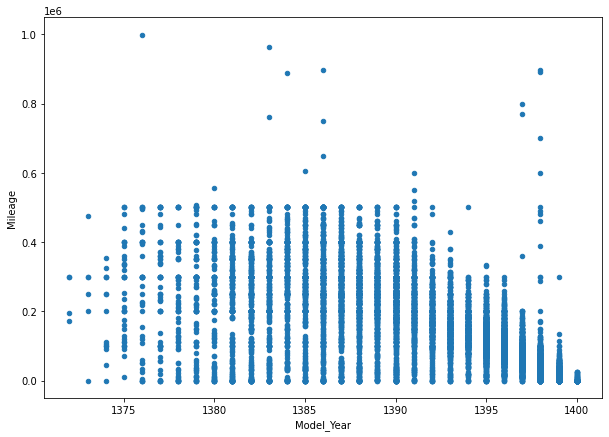

In [ ]:
ty_df[ty_df['Brand'] == 'pride'].plot(kind='scatter' , x = 'Model_Year' , y = 'Mileage' , figsize=(10,7))

## Encoding 

In [ ]:
encod = ty_df.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
onehot_encoder = OneHotEncoder(sparse=False)
standard_scaler = StandardScaler()

In [ ]:
encod .drop (encod[encod['Body_Condition'] =='Nan'].index , axis = 0 , inplace=True)
encod.reset_index(drop= True , inplace=True)

In [ ]:
data_cat_hot_tmp = onehot_encoder.fit_transform(encod[['Brand' , 'Color' , 'Body_Condition']])
data_cat_hot=pd.DataFrame(data_cat_hot_tmp)
data_cat_hot.columns = onehot_encoder.get_feature_names(['brand' , 'color' , 'body'])
encod = pd.concat([encod , data_cat_hot] , axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
encod.drop(columns = ['Brand' ,'Color' , 'Body_Condition' , 'Selling_Method' , 'Time' , 'City' , 'inser_date' , 'Location' ] , inplace=True , axis = 1) 

In [ ]:
encod

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Type,brand_206,brand_pride,...,body_4 spot color,body_crashed,body_full color,body_intact,body_multi spot color,body_multi spot repare,body_round color,body_scrap,body_scratches,body_under 2 spot repare
0,1399,0,156483496.0,2,2,12,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1396,80000,125500000.0,2,2,6,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1393,85000,215000000.0,2,2,4,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1390,300000,152592593.0,2,2,8,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1390,377678,79440000.0,2,2,1,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,1392,195000,112000000.0,2,2,4,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14731,1390,246000,110000000.0,2,2,8,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14732,1399,30000,165000000.0,2,2,6,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14733,1393,120000,225000000.0,2,2,7,0.0,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num = encod[['Model_Year','Mileage' ,'Third_party_insurance' ]]
data_num_scaled_tr = pd.DataFrame(standard_scaler.fit_transform(num.values ), columns=num.columns)
encod[num.columns] = data_num_scaled_tr

In [ ]:
encod

,Model_Year,Mileage,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Type,brand_206,brand_pride,...,body_4 spot color,body_crashed,body_full color,body_intact,body_multi spot color,body_multi spot repare,body_round color,body_scrap,body_scratches,body_under 2 spot repare
0,1.165590,-1.233094,156483496.0,2,2,1.441217,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.647731,-0.564776,125500000.0,2,2,-0.414349,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.129872,-0.523006,215000000.0,2,2,-1.032871,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.387987,1.273098,152592593.0,2,2,0.204173,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.387987,1.922018,79440000.0,2,2,-1.960653,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,-0.042748,0.395931,112000000.0,2,2,-1.032871,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14731,-0.387987,0.821984,110000000.0,2,2,0.204173,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14732,1.165590,-0.982474,165000000.0,2,2,-0.414349,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14733,0.129872,-0.230617,225000000.0,2,2,-0.105088,0.0,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Implementation

In [ ]:
final = encod.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import sklearn
import statistics
from scipy import stats

In [ ]:
train_set , rem_set = train_test_split(final, test_size = 0.3 , random_state=42)
test_set , cv_set = train_test_split(rem_set, test_size = 0.5 , random_state=42)
prepared_df = train_set.drop('Price' , axis = 1)
target = train_set['Price']
X = test_set.drop('Price' , axis = 1 )
y = test_set['Price']
#CV_set
X_cv = cv_set.drop('Price' , axis = 1)
y_cv = cv_set['Price']

In [ ]:
#================================== linear ** Regression ==================================#
lin_reg = LinearRegression()
lin_reg.fit(prepared_df,target)
order_predications = lin_reg.predict(prepared_df)
#lin_mse = mean_squared_error(target ,order_predications )
lin_mae = mean_absolute_error(target ,order_predications )
lin_mae_p = mean_absolute_percentage_error(target, order_predications)
#lin_rmse = np.sqrt(lin_mse)
print('mae: ',lin_mae)
print('error percentage: ' , lin_mae_p)

mae:  11355570.399233134
error percentage:  0.10753496034728405


In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_df,target)  
order_predications = tree_reg.predict(prepared_df)
#lin_mse = mean_squared_error(target ,order_predications )
des_mae = mean_absolute_error(target ,order_predications )
des_mae_p = mean_absolute_percentage_error(target, order_predications)
#lin_rmse = np.sqrt(lin_mse)
print('mae: ',des_mae)
print('error percentage: ' , des_mae_p)

mae:  306620.0701290867
error percentage:  0.00204241311278727


In [ ]:
#================================== RandomForest ** Regression ==================================#
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_df,target) 
order_predications = forest_reg.predict(prepared_df)
#rand_mse = mean_squared_error(target ,order_predications )
rand_mae = mean_absolute_error(target ,order_predications )
rand_mae_p = mean_absolute_percentage_error(target, order_predications)
#lin_rmse = np.sqrt(lin_mse)
print('mae: ',rand_mae)
print('error percentage: ' , rand_mae_p)

mae:  2527426.302864324
error percentage:  0.022072960606900383


In [ ]:
param_grid = [{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=0)
grid_search.fit(prepared_df, target)
print(grid_search.best_params_)

{'C': 30000.0, 'kernel': 'linear'}


In [ ]:
models = ['linear regression' , 'decision tree' , 'random forest' , 'SVR']
dict={}
for model_type in models:
    if model_type == 'linear regression':
        model = LinearRegression()
    elif model_type == 'decision tree':
        model = DecisionTreeRegressor(criterion= 'mse', max_depth= 19, min_samples_leaf= 14, min_samples_split= 4, splitter= 'random')
    elif model_type == 'random forest':
        model = RandomForestRegressor()
    elif model_type == 'SVR':
        model = SVR(C = 30000.0 , kernel= 'linear')
          
    model.fit(prepared_df,target)
    model_train_prediction = model.predict(prepared_df)
    model_test_prediction = model.predict(X)
    model_train_mae = mean_absolute_error(target ,model_train_prediction )
    model_test_mae = mean_absolute_error(y ,model_test_prediction )    
    model_train_mse =np.sqrt( mean_squared_error(target ,model_train_prediction ))
    mdoel_test_mse = np.sqrt(mean_squared_error(y ,model_test_prediction))
    
    dict.setdefault(model_type , [model_train_mae , model_test_mae , model_train_mse , mdoel_test_mse])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
res =pd.DataFrame.from_dict(dict , orient='index' , columns = ['Train MAE' , 'Test MAE' , 'Train MSE' , 'Test MSE'])
res

,Train MAE,Test MAE,Train MSE,Test MSE
linear regression,1.135557e+07,1.105933e+07,1.939941e+07,1.587344e+07
decision tree,6.253424e+06,6.577475e+06,1.409851e+07,1.001463e+07
random forest,2.520692e+06,6.455349e+06,6.110228e+06,1.124720e+07
SVR,1.219730e+07,1.182068e+07,2.128182e+07,1.794118e+07


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
class MyNeuralNetwork (tf.keras.Model):
    def __init__(self,l2,n_first_layer ,n_second_layer, n_third_layer =None):
        super(MyNeuralNetwork , self).__init__()
        self.all_in_one = tf.keras.Sequential ( [ tf.keras.layers.Dense ( n_first_layer , activation = 'relu' , kernel_regularizer=tf.keras.regularizers.L2(l2)),
                                                 tf.keras.layers.Dense (n_second_layer , activation = 'relu' , kernel_regularizer=tf.keras.regularizers.L2(l2)) ,
                                                 tf.keras.layers.Dense(1)]
                                                )
    def call (self , x):
        output = self.all_in_one(x)
        return output

In [ ]:
dict = {}
for l2 in [0.0001,0.001 , 0.005, 0.01 , 0.05]: #np.arange(0.01 , 0.1 , 0.01):
    
    model = MyNeuralNetwork(l2 ,60,30)
    model.compile(optimizer = 'adam'  , loss = tf.keras.losses.mae , metrics = ['mae'])
    call_back = tf.keras.callbacks.EarlyStopping (monitor = 'val_loss' , patience = 10 , restore_best_weights=True)
    history = model.fit(prepared_df , target , epochs = 100 , validation_data = (X_cv , y_cv) , callbacks=[call_back] , verbose=0)
    dict.setdefault(l2 ,[np.round(history.history['loss'][-1] , 2) ,np.round(history.history['val_loss'][-1] , 2)] )

ValueError: ignored

In [ ]:
target

In [ ]:
call_back = tf.keras.callbacks.EarlyStopping (monitor = 'val_loss' , patience = 10 , restore_best_weights=True)
model.compile(optimizer = 'adam'  , loss = tf.keras.losses.mae , metrics = ['mae'])
history = model.fit(prepared_df , target , epochs = 150 , validation_data = (X_cv , y_cv) , callbacks=[call_back] , verbose=0)

In [ ]:
y_cv